In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import dc_stat_think as dcst
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy

In [181]:
sns.set()

In [8]:
jpy = pd.read_csv("JPY.csv").Close
aud = pd.read_csv("AUD.csv").Close
jpy.iloc[295] = np.mean([jpy.iloc[294], jpy.iloc[296]])
aud.iloc[295] = np.mean([aud.iloc[294], aud.iloc[296]])

In [9]:
jpy1 = np.diff(jpy)/jpy[:-1]*100
aud1 = np.diff(aud)/aud[:-1]*100

In [10]:
port = 0.71*jpy + 0.29*aud
PORT = np.diff(port)/port[:-1]*100
port1 = 0.71*jpy1 + 0.29*aud1

In [12]:
djia = pd.read_csv("DJIA.csv")
djia = djia.iloc[:, 1].values

In [13]:
for i in range(len(djia)-1):
    if djia[i] == ".":
        djia[i] = np.mean([float(djia[i-1]), float(djia[i+1])])

In [14]:
for i in range(0,len(djia)):
    djia[i] = float(djia[i])

In [15]:
jpy1 = np.expand_dims(jpy1, axis=1)
aud1 = np.expand_dims(aud1, axis=1)

In [16]:
djia1 = np.diff(djia)/djia[:-1]*100

# REGRESJA JPY

In [17]:
model_jpy = LinearRegression().fit(jpy1, djia1)

In [18]:
#coefficient of determination, 𝑅²
r = model_jpy.score(jpy1,djia1)
r

0.00025281092311202347

In [19]:
corr, _ = scipy.stats.pearsonr(jpy1[:,0], djia1)
corr**2

0.00025281092311181915

In [20]:
#The attributes of model are .intercept_, which represents the coefficient 𝑏₀, and .coef_, which represents 𝑏₁:
b0 = model_jpy.intercept_
b1 = model_jpy.coef_
print(f"intercept α: {model_jpy.intercept_}") 
print(f"slope β: {model_jpy.coef_}")

intercept α: 0.033971892245533784
slope β: [-0.04094296]


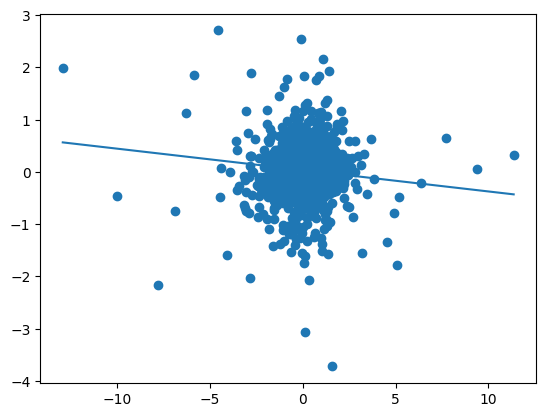

In [21]:
plt.scatter(djia1, jpy1)
plt.plot([min(djia1), max(djia1)], [b1 * min(djia1) + b0, b1 * max(djia1) + b0])

In [22]:
y_pred = model_jpy.predict(jpy1)
print(f"predicted response:\n{y_pred}")

predicted response:
[0.02096978 0.02331186 0.03718454 ... 0.01467025 0.02948431 0.08248439]


In [23]:
y_pred = b0 + b1 * djia1
print(f"predicted response:\n{y_pred}")

predicted response:
[-0.006680331938087508 0.12961766155942261 0.026044278754646693 ...
 -0.017752827122186066 -0.00626459020571124 0.05819199161543817]


In [88]:
pr_regr_jpy = b0 + b1*jpy1
e =jpy1-y_pred
np.var(e)

0.2646587419242186

In [89]:
np.mean(e)

-0.01492692752809601

# REGRESJA AUD

In [103]:
model_aud = LinearRegression().fit(aud1, djia1)

In [104]:
r = model_aud.score(aud1,djia1)
print(r)
corr, _ = scipy.stats.pearsonr(aud1[:,0], djia1)
corr**2

0.0013706390137071534


0.0013706390137067437

In [105]:
b0 = model_aud.intercept_
b1 = model_aud.coef_
print(b0)
print(b1)

0.034143330048526974
[-0.07413932]


In [106]:
beta_aud=beta(aud1[:,0].astype(float),djia1.astype(float))
beta_aud

kowariancja: -0.03211114858153077
determinacja: 0.02207687864917645


-0.07419621957551961

In [107]:
alpha_aud=np.mean(aud1)-beta_aud*np.mean(djia1)
alpha_aud

0.014544947550464628

In [109]:
res_aud = aud1 - alpha_aud - beta_aud*djia1 

In [110]:
np.mean(res_aud)

2.982861228228363e-16

In [111]:
np.var(res_aud)

0.4423414386853932

### Ala wbija na rejon

Sprawdze z tymi teoretycznymi wzorami

In [67]:
np.mean(djia1)

0.033247869303474495

In [61]:
a =np.stack((jpy1[:,0],djia1), axis=1)
a

array([[0.3175664338447409, 0.9928990327353433],
       [0.26036300484457425, -2.3360737018480253],
       [-0.07846653815965364, 0.19362580830627202],
       ...,
       [0.47142769516571037, 1.2633361362158366],
       [0.10960578044891965, 0.9827448635051533],
       [-1.1848800497949015, -0.5915571342052401]], dtype=object)

In [92]:
def beta(R_i, R_m):
    cov = np.cov(R_i, R_m)
    cov = cov[0,1]
    print("kowariancja:",cov)
    beta = cov / np.var(R_i)
    determinacja = beta**2 * np.var(R_m) / np.var(R_i)
    print("determinacja:",determinacja)
    return beta

In [93]:
beta_jpy=beta(jpy1[:,0].astype(float),djia1.astype(float))
beta_jpy

kowariancja: -0.010725016351175782
determinacja: 0.011132364407187295


-0.04097438086494938

In [78]:
alpha_jpy=np.mean(jpy1)-beta_jpy*np.mean(djia1)
alpha_jpy

0.01904600943435447

In [79]:
res_jpy = jpy1 - alpha_jpy - beta_jpy*djia1 

In [206]:
res_jpy2 = [jpy1[i] - alpha_jpy-beta_jpy*djia1[i] for i in range(len(jpy1))]
res_aud2 =[aud1[i] - alpha_aud-beta_aud*djia1[i] for i in range(len(jpy1))]

In [124]:
np.mean(res_jpy)

1.5489189152682642e-16

In [209]:
np.mean(res_jpy2)

-5.448947360123468e-18

In [102]:
np.var(res_jpy)

0.2646632093652065

In [96]:
var = np.sum((jpy1[:,0] - alpha_jpy - beta_jpy * djia1) ** 2) / ( len(jpy1[:,0]) -1)
var

0.2639874259051767

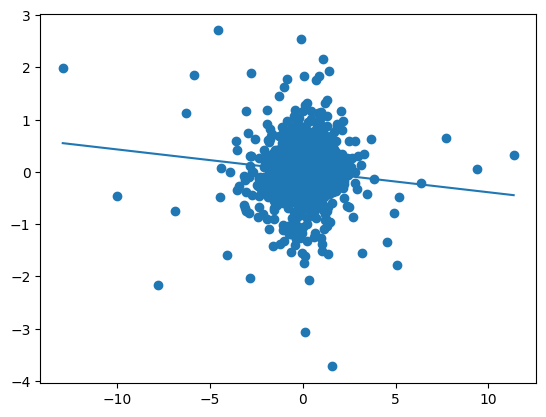

In [85]:
plt.scatter(djia1, jpy1)
plt.plot([min(djia1), max(djia1)], [beta_jpy * min(djia1) + alpha_jpy, beta_jpy * max(djia1) + alpha_jpy])

# LECIMY DALEJ

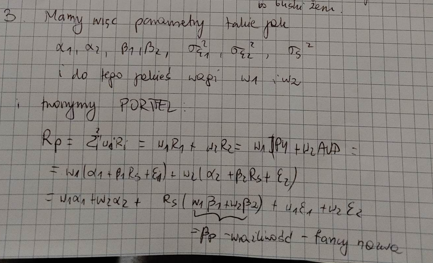

In [112]:
α_jpy, α_aud, β_jpy, β_aud, σ2_jpy, σ2_aud = alpha_jpy, alpha_aud, beta_jpy, beta_aud, np.var(res_jpy), np.var(res_aud)

In [113]:
w_jpy, w_aud = 0.71, 0.29

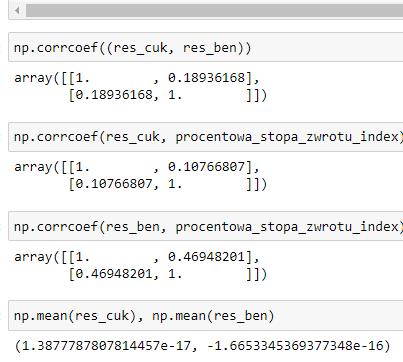

In [215]:
np.corrcoef((res_jpy[:,0].astype(float), res_aud[:,0].astype(float)))

array([[1.        , 0.29777735],
       [0.29777735, 1.        ]])

In [217]:
np.corrcoef((res_jpy[:,0].astype(float), djia1.astype(float)))

array([[ 1.        , -0.01590003],
       [-0.01590003,  1.        ]])

In [218]:
np.corrcoef((res_aud[:,0].astype(float), djia1.astype(float)))

array([[ 1.        , -0.03702214],
       [-0.03702214,  1.        ]])

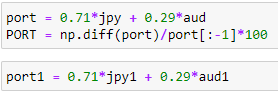

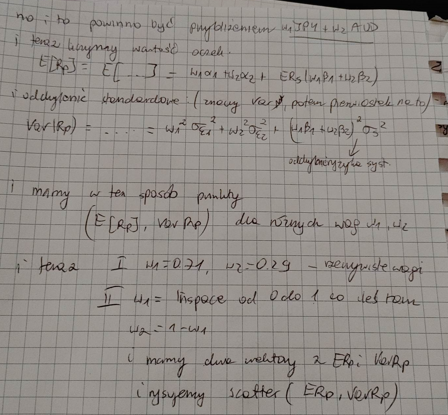

In [130]:
def jazda(Rs, alpha_A, alpha_B, beta_A, beta_B, se_A, se_B):
    
    nazwy = ['Średnia jpy',
             'Średnia aud',
             'Odchylenie std jpy',
             'Odchylenie std aud',
             'Współczynnik korelacji']
    varB = np.sqrt(se_B+(beta_B**2)*np.var(Rs, ddof=1))
    varA = np.sqrt(se_A+(beta_A**2)*np.var(Rs, ddof=1))
    wartosci = [alpha_A + beta_A*np.mean(Rs), alpha_B + beta_B*np.mean(Rs),
                varA, varB,
                beta_A*beta_B*np.var(Rs, ddof=1)/np.sqrt(varA*varB)]
    #beta_A*beta_B*np.var(Rs, ddof=1)/np.sqrt(varA*varB)
    return pd.DataFrame({'Parametr':nazwy, 'Wartość': wartosci})

In [131]:
jazda(djia1, α_jpy, α_aud, β_jpy, β_aud, σ2_jpy, σ2_aud)

,Parametr,Wartość
0,Średnia jpy,0.017684
1,Średnia aud,0.012078
2,Odchylenie std jpy,0.517281
3,Odchylenie std aud,0.672238
4,Współczynnik korelacji,0.008955


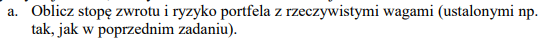

In [143]:
def portfel(w1, w2, Rs, alpha_A, alpha_B, beta_A, beta_B, se_A, se_B):
    nazwy = ['stopa zwrotu', 'ryzyko']
    st = w1*alpha_A + w2*alpha_B + (w1*beta_A + w2*beta_B)*np.mean(Rs)
    ryzyko = np.sqrt(w1**2*se_A**2 + w2**2*se_B**2 +(w1*beta_A + w2*beta_B)**2 * np.var(Rs))
    wartosci = [st, ryzyko]
    
    return pd.DataFrame({'Parametr':nazwy, 'Wartość': wartosci})

In [144]:
portfel(w_jpy, w_aud, djia1, α_jpy, α_aud, β_jpy, β_aud, σ2_jpy, σ2_aud)

,Parametr,Wartość
0,stopa zwrotu,0.016058
1,ryzyko,0.237089


In [161]:
def zwroc_portfel(w1, w2, Rs, alpha_A, alpha_B, beta_A, beta_B, se_A, se_B):
    st = w1*alpha_A + w2*alpha_B + (w1*beta_A + w2*beta_B)*np.mean(Rs)
    ryzyko = np.sqrt(w1**2*se_A + w2**2*se_B +(w1*beta_A + w2*beta_B)**2 * np.var(Rs))
    wartosci = [st, ryzyko]
    
    return wartosci

In [177]:
def rysuj_portfel(Rs, alpha_A, alpha_B, beta_A, beta_B, se_A, se_B, show=1):
    
    wA = np.arange(0,1.01,0.01)
    
    st, ryzyko = [], []
    for i in wA:
        wB= 1 - i
        data = zwroc_portfel(i, wB, Rs, alpha_A, alpha_B, beta_A, beta_B, se_A, se_B)
        st.append(data[0])
        ryzyko.append(data[1])
        
    plt.plot(ryzyko, st)
    plt.title('Wykres możliwych portfeli dla wag od 0.01 do 0.99')
    plt.xlabel('sigma_b')
    plt.ylabel('ER_b')
    if show == 1:
        plt.show()
    #return st, ryzyko

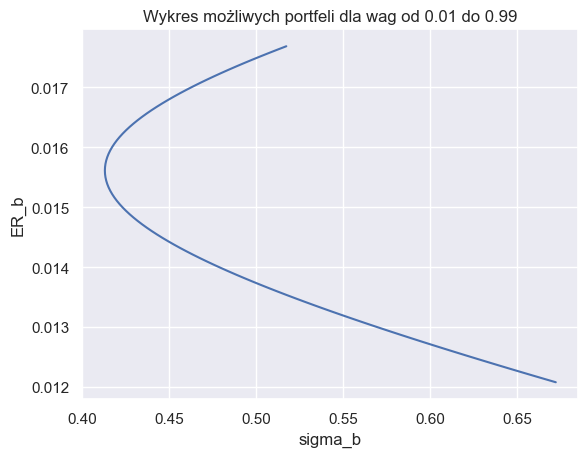

In [182]:
rysuj_portfel(djia1, α_jpy, α_aud, β_jpy, β_aud, σ2_jpy, σ2_aud)

In [145]:
wA = np.arange(0,1.1,0.1)
wB = 1-wA
wB

array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [162]:
wA = np.arange(0,1.05,0.05)

tt = ["{wA}JPY + {wB}AUD".format(wA = str(round(w,2)), wB =str(round(1-w,2))) for w in wA]
ms = []
st = []
for w in wA:
    data = zwroc_portfel(w, (1-w), djia1, α_jpy, α_aud, β_jpy, β_aud, σ2_jpy, σ2_aud)
    ms.append(data[0])
    st.append(data[1])
d = {"portfel" : tt, "ŚREDNIA" : ms, "STD" : st}
qq = pd.DataFrame(data=d)
qq

,portfel,ŚREDNIA,STD
0,0.0JPY + 1.0AUD,0.012078,0.672232
1,0.05JPY + 0.95AUD,0.012358,0.639536
2,0.1JPY + 0.9AUD,0.012639,0.607998
3,0.15JPY + 0.85AUD,0.012919,0.577807
4,0.2JPY + 0.8AUD,0.013199,0.549186
5,0.25JPY + 0.75AUD,0.013479,0.522392
6,0.3JPY + 0.7AUD,0.013760,0.497722
7,0.35JPY + 0.65AUD,0.014040,0.475505
8,0.4JPY + 0.6AUD,0.014320,0.456100
9,0.45JPY + 0.55AUD,0.014601,0.439880


In [163]:
print("MIN RYZYKO:\n", qq.iloc[qq["STD"].idxmin(axis=0)])
print("\n")
print("MAX ZYSK:\n", qq.iloc[qq["ŚREDNIA"].idxmax(axis=0)])

MIN RYZYKO:
 portfel    0.65JPY + 0.35AUD
ŚREDNIA             0.015722
STD                 0.413291
Name: 13, dtype: object


MAX ZYSK:
 portfel    1.0JPY + 0.0AUD
ŚREDNIA           0.017684
STD               0.517279
Name: 20, dtype: object


In [164]:
##troche dokładniej, no problemo malenka
wA = np.arange(0,1.01,0.01)

tt = ["{wA}JPY + {wB}AUD".format(wA = str(round(w,2)), wB =str(round(1-w,2))) for w in wA]
ms = []
st = []
for w in wA:
    data = zwroc_portfel(w, (1-w), djia1, α_jpy, α_aud, β_jpy, β_aud, σ2_jpy, σ2_aud)
    ms.append(data[0])
    st.append(data[1])
d = {"portfel" : tt, "ŚREDNIA" : ms, "STD" : st}
qq = pd.DataFrame(data=d)
display(qq)
print("MIN RYZYKO:\n", qq.iloc[qq["STD"].idxmin(axis=0)])
print("\n")
print("MAX ZYSK:\n", qq.iloc[qq["ŚREDNIA"].idxmax(axis=0)])

,portfel,ŚREDNIA,STD
0,0.0JPY + 1.0AUD,0.012078,0.672232
1,0.01JPY + 0.99AUD,0.012134,0.665608
2,0.02JPY + 0.98AUD,0.012190,0.659026
3,0.03JPY + 0.97AUD,0.012246,0.652485
4,0.04JPY + 0.96AUD,0.012302,0.645988
...,...,...,...
96,0.96JPY + 0.04AUD,0.017459,0.497722
97,0.97JPY + 0.03AUD,0.017516,0.502471
98,0.98JPY + 0.02AUD,0.017572,0.507315
99,0.99JPY + 0.01AUD,0.017628,0.512252


MIN RYZYKO:
 portfel    0.63JPY + 0.37AUD
ŚREDNIA              0.01561
STD                 0.412948
Name: 63, dtype: object


MAX ZYSK:
 portfel    1.0JPY + 0.0AUD
ŚREDNIA           0.017684
STD               0.517279
Name: 100, dtype: object


In [157]:
##najdokładniej - ze wzorku PRZEKONAJMY SIE
sj = np.sqrt(σ2_jpy+(β_jpy**2)*np.var(djia1))
sa = np.sqrt(σ2_aud+(β_aud**2)*np.var(djia1))
cor = β_jpy * β_aud*np.var(djia1, ddof=1)/np.sqrt(sj*sa)
mr = (sa**2-sa*sj*cor)/(sa**2 + sj**2 - 2*sa*sj*cor) ##minimalne ryzyko
mr

0.6292114307382649

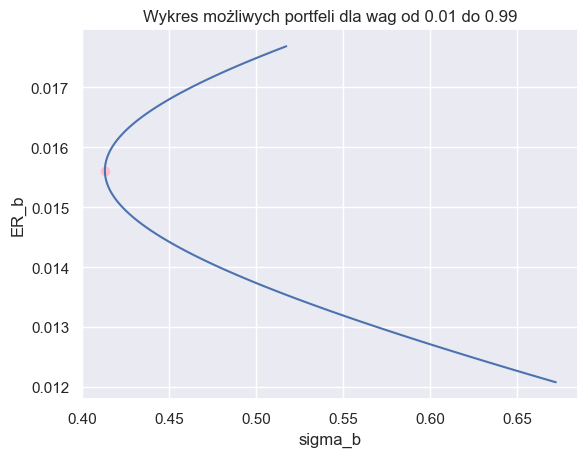

In [183]:

rysuj_portfel(djia1, α_jpy, α_aud, β_jpy, β_aud, σ2_jpy, σ2_aud, show=0)
plt.scatter(0.412948,0.01561, color="pink")
plt.show()

In [199]:
plt.rcParams["figure.figsize"] = (6,4)

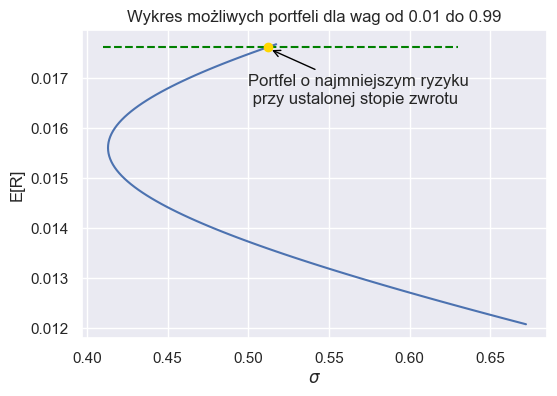

In [201]:
ulsko = 0.017624

# wagi aud: 0  jpy: 1

fig, ax = plt.subplots()
#ax.plot([0, 1],[0, 1])
rysuj_portfel(djia1, α_jpy, α_aud, β_jpy, β_aud, σ2_jpy, σ2_aud, show=0)
plt.xlabel("$\sigma$")
plt.ylabel("E[R]")
ax.plot([0.41,0.63],[ulsko, ulsko], "--", color = "green")
ax.annotate("Portfel o najmniejszym ryzyku \n przy ustalonej stopie zwrotu", xy=(0.5131, 0.01759), xytext=(0.5, 0.0165), arrowprops={"arrowstyle":"->", "color":"black"})
ax.scatter(0.5124, ulsko, zorder = 4, color = "gold") 
plt.show()